Dataset name - Stroke Prediction Dataset.

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient. But from this dataset heart_disease or hypertension can also be used as target variables. 

I want to predict heart_disease based on the other features like gender, age, hypertension, work_type, Residence_type, bmi etc. There are in total 11 features (not considering ‘id’ as a relevant feature). I want to take ‘heart_disease’ as my target variable and other 10 variables as features.

To predict the target feature ‘heart_disease’ I need to analyze the data thoroughly. I plan to follow the below steps in general. But the there may be some additional steps on Data visualization, metrics measurements, special observations etc. 

The columns ‘heart_disease’, ‘hypertension’ and ‘stroke’ contain classified values as 0 (negative) or 1 (positive).
There are five columns ‘gender’, ‘ever_married’, ‘work_type’, ‘residence_type’ and ‘smoking_status’ containing categorical data. So I need to encode them to numeric to use them in model.

# **Problem Statement:**
So,  I consider '**heart_disease**' as target column. Other 10 columns 'gender', 'age', 'hypertension', 'ever_married', ' work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status' and 'stroke as input columns.

I am going to use the Classification algorithms like MDC, Knn and Logistic regression. The metrics will be used like accuracy score, F1 Score, Precision and Recall. And also the Confusion matrix. 

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier, 
                              HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [187]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [188]:
df.shape

(5110, 12)

In [189]:
# checking null values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [191]:
# bmi value gender wise

df.groupby(['gender'])['bmi'].agg(['mean', 'median'])

,mean,median
gender,,
Female,29.065758,27.8
Male,28.647936,28.4
Other,22.400000,22.4


In [192]:
# filling all null values with their gender respective median values

df.bmi[df.gender=='Female'] = df.bmi[df.gender=='Female'].fillna(27.8)
df.bmi[df.gender=='Male'] = df.bmi[df.gender=='Male'].fillna(28.4)
df.bmi[df.gender=='Other'] = df.bmi[df.gender=='Other'].fillna(22.4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [193]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [194]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.8,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


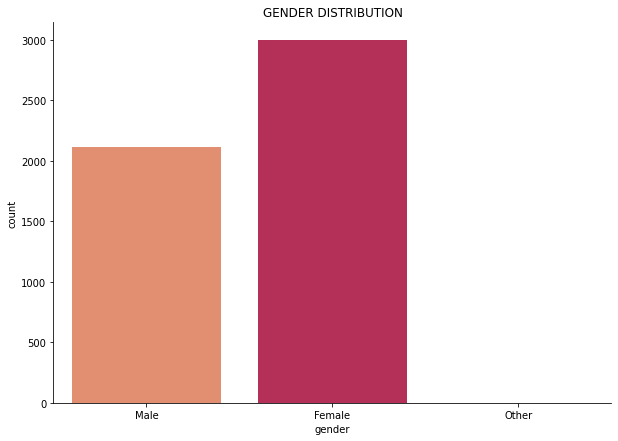

In [195]:
fig, ax = plt.subplots(figsize=(10,7))
plt.title('GENDER DISTRIBUTION')
sns.countplot(data=df,x=df['gender'],palette='rocket_r')
plt.show()

In [196]:
# since "Other" gender is only one instance in the data so let's drop it

df = df.loc[~(df.gender=="Other")]
df.shape

(5109, 12)

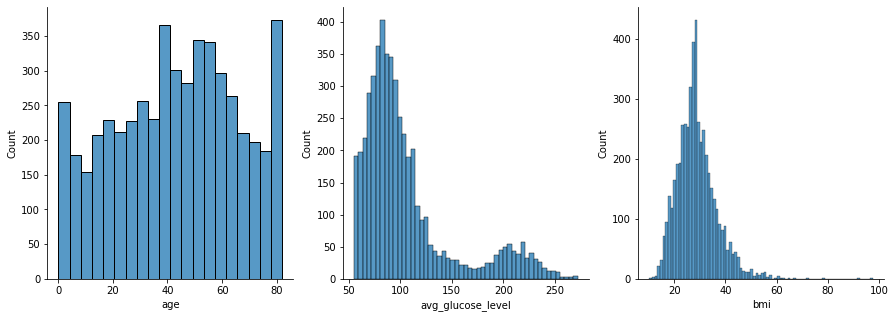

In [197]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs = np.ravel(axs)

for i, col in enumerate(numerical_cols):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, palette='Set2')

plt.show()

Removing the outliers of 'bmi'.

In [198]:
# dropping bmi outliers

df = df.loc[~(df.bmi>60)]
df.shape

(5096, 12)

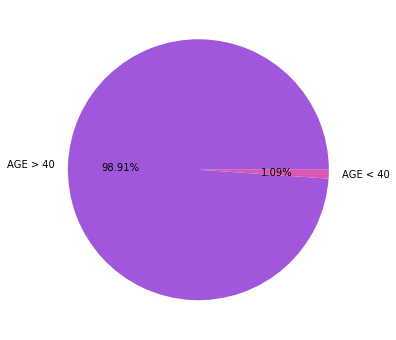

In [199]:
# Relation between age and heart disease
plt.figure(figsize=(6, 6))
classx = ['AGE > 40','AGE < 40']
colors = sns.color_palette("hls", 8)[6:8]
countx = [len(df.loc[(df.age > 40) & (df.heart_disease == 1)]),len(df.loc[(df.age <= 40) & (df.heart_disease == 1)])]
plt.pie(countx, labels = classx,colors=colors,autopct='%1.2f%%')
plt.show()

From the above pie chart, it can be seen that almost 99% people having heart disease are more than 40 years old.

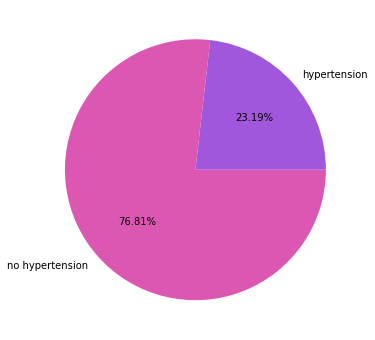

In [200]:
# Relation between hypertension and heart disease
plt.figure(figsize=(6, 6))
classx = ['hypertension','no hypertension']
colors = sns.color_palette("hls", 8)[6:8]
countx = [len(df.loc[(df.hypertension == 1) & (df.heart_disease == 1)]),len(df.loc[(df.hypertension == 0) & (df.heart_disease == 1)])]
plt.pie(countx, labels = classx,colors=colors,autopct='%1.2f%%')
plt.show()

<Figure size 360x360 with 0 Axes>

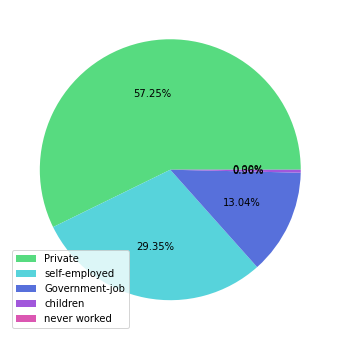

In [201]:
# Relation between heart disease and work_type

plt.figure(figsize=(5, 5))
df2 = df[df.heart_disease == 1]
plt.figure(figsize=(6, 6))
classx = ['Private','self-employed','Government-job','children','never worked']
colors = sns.color_palette("hls", 8)[3:8]
countx = []
for i in df.work_type.unique():
    countx.append(len(df2[df2.work_type == i]))
plt.pie(countx, labels=['','','','',''],colors=colors,autopct='%1.2f%%')
plt.legend(loc=3,labels=classx)
plt.show()

From the above picture, it can be seen that private sector employees have the most chance of heart disease.

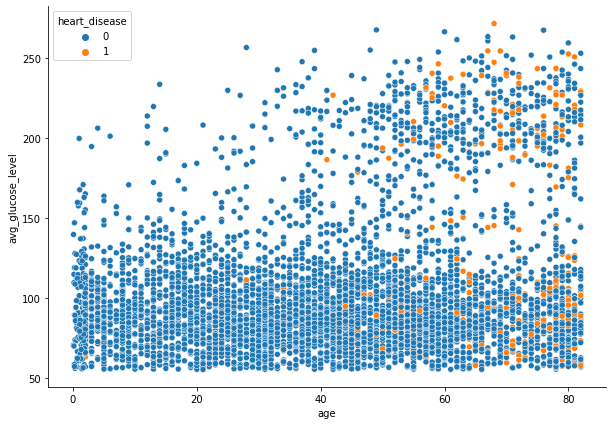

In [204]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=df,x='age',y='avg_glucose_level',hue='heart_disease')
plt.show()

People over 50 and higher glucose level seem to have more chance of heart disease.

I am going to predict the **heart_disease** column as target variables' column. I need to check whether the values in **heart_disease** column is balanced or not.

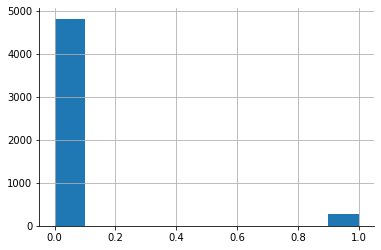

In [205]:
df['heart_disease'].hist()

In [206]:
df['heart_disease'].value_counts()

0    4820
1     276
Name: heart_disease, dtype: int64

Here the target column is highly unbalanced. So, I use Over sampling method to increase the values of minority class.

In [208]:
# A 2-dimensional plot function, plot_2d_space, to see the data distribution.
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [209]:
# Separating X and y values, that is input and target values
# ignoring the column 'id'
X = df[['gender','age', 'hypertension','ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]
y = df['heart_disease']
type(X)

pandas.core.frame.DataFrame

In [210]:
# Encoding the text columns 'gender', 'ever_married', 'work_type', 'Residence_type' and 'smoking_status'
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(X['gender'])
X['gender']=le.transform(X['gender'])

le = preprocessing.LabelEncoder()
le.fit(X['ever_married'])
X['ever_married']=le.transform(X['ever_married'])

le = preprocessing.LabelEncoder()
le.fit(X['work_type'])
X['work_type']=le.transform(X['work_type'])

le = preprocessing.LabelEncoder()
le.fit(X['Residence_type'])
X['Residence_type']=le.transform(X['Residence_type'])

le = preprocessing.LabelEncoder()
le.fit(X['smoking_status'])
X['smoking_status']=le.transform(X['smoking_status'])

X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,1,228.69,36.6,1,1
1,0,61.0,0,1,3,0,202.21,27.8,2,1
2,1,80.0,0,1,2,0,105.92,32.5,2,1
3,0,49.0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,1,3,0,174.12,24.0,2,1


In [211]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

4544 new random picked points


In [213]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)


In [214]:
y.value_counts()

0    4820
1     276
Name: heart_disease, dtype: int64

In [215]:
y_sm.value_counts(), X_sm.shape

(1    4820
 0    4820
 Name: heart_disease, dtype: int64, (9640, 10))

In [216]:
# getting training and test data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

((7712, 10), (7712,))

In [217]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix

def show_model_results(model):
    """A simple function to show a model results"""
    print(f"{model.__class__.__name__:*^50}\n")
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    print(f"Train Acc.: {model.score(X_train, y_train)*100:.2f}%")
    print(f"Test Acc.: {model.score(X_test, y_test)*100:.2f}%")
    print("Accuracy Score: " + str(accuracy_score(y_test, y_pred_test)))
    print("F1_Score: " + str(f1_score(y_test, y_pred_test, average='weighted')))
    print("Precision_Score: " + str(precision_score(y_test, y_pred_test, average='weighted')))
    print("recall_Score: " + str(recall_score(y_test, y_pred_test, average='weighted')))
    x = "Confusion Matrix"
    print(f"\n{x:*^30}\n")
    print(confusion_matrix(y_test, model.predict(X_test)))

    plot_confusion_matrix(model, X_test, y_test)

*****************NearestCentroid******************

Train Acc.: 66.27%
Test Acc.: 66.80%
Accuracy Score: 0.6680497925311203
F1_Score: 0.6578514214782011
Precision_Score: 0.6844057852354372
recall_Score: 0.6680497925311203

*******Confusion Matrix*******

[[823 166]
 [474 465]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


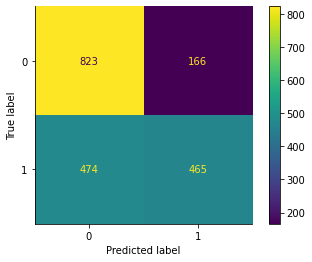

In [218]:
# MDC Classifier
from sklearn.neighbors import NearestCentroid
mdcModel = NearestCentroid()

show_model_results(mdcModel)

***************KNeighborsClassifier***************

Train Acc.: 92.16%
Test Acc.: 89.68%
Accuracy Score: 0.8967842323651453
F1_Score: 0.896239683801203
Precision_Score: 0.9094301861829704
recall_Score: 0.8967842323651453

*******Confusion Matrix*******

[[806 183]
 [ 16 923]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


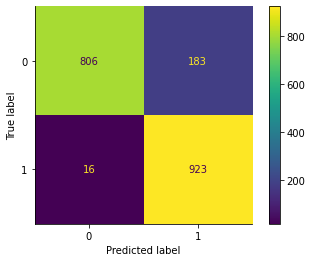

In [219]:
# Knn classifier

from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=5)
show_model_results(knnModel)

****************LogisticRegression****************

Train Acc.: 82.12%
Test Acc.: 82.94%
Accuracy Score: 0.8293568464730291
F1_Score: 0.8293633193145411
Precision_Score: 0.8303560314310757
recall_Score: 0.8293568464730291

*******Confusion Matrix*******

[[801 188]
 [141 798]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


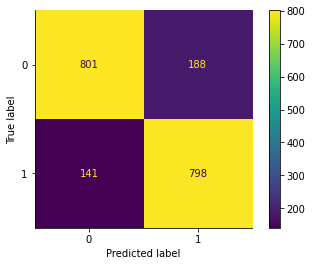

In [220]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

logModel = LogisticRegression()

show_model_results(logModel)

**************DecisionTreeClassifier**************

Train Acc.: 100.00%
Test Acc.: 90.77%
Accuracy Score: 0.9076763485477178
F1_Score: 0.9076763485477177
Precision_Score: 0.9088980895471511
recall_Score: 0.9076763485477178

*******Confusion Matrix*******

[[875 114]
 [ 64 875]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


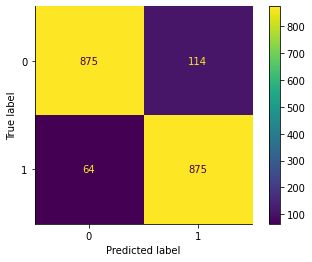

In [221]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

treeModel = DecisionTreeClassifier()
show_model_results(treeModel)

From the above four models, it can be seen that the Decision tree and Knn classifiers work best for this dataset. As the accuracy and F1 scores are better for Decision tree classifier and Knn classifier.

Next I will try the Decision tree and Knn method with normalized data and will see the difference of the metrices with previous non normalized dataset.

In [222]:
# scaling data

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [223]:
def show_model_results_scaled_data(model):
    """A simple function to show a model results"""
    print(f"{model.__class__.__name__:*^50}\n")
    model.fit(X_train_scaled, y_train)
    y_pred_test = model.predict(X_test_scaled)
    print(f"Train Acc.: {model.score(X_train_scaled, y_train)*100:.2f}%")
    print(f"Test Acc.: {model.score(X_test_scaled, y_test)*100:.2f}%")
    print("Accuracy Score: " + str(accuracy_score(y_test, y_pred_test)))
    print("F1_Score: " + str(f1_score(y_test, y_pred_test, average='weighted')))
    print("Precision_Score: " + str(precision_score(y_test, y_pred_test, average='weighted')))
    print("recall_Score: " + str(recall_score(y_test, y_pred_test, average='weighted')))
    x = "Confusion Matrix"
    print(f"\n{x:*^30}\n")
    print(confusion_matrix(y_test, model.predict(X_test_scaled)))

    plot_confusion_matrix(model, X_test_scaled, y_test)

***************KNeighborsClassifier***************

Train Acc.: 91.60%
Test Acc.: 88.80%
Accuracy Score: 0.8879668049792531
F1_Score: 0.8877466663262313
Precision_Score: 0.8937856205574048
recall_Score: 0.8879668049792531

*******Confusion Matrix*******

[[824 165]
 [ 51 888]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


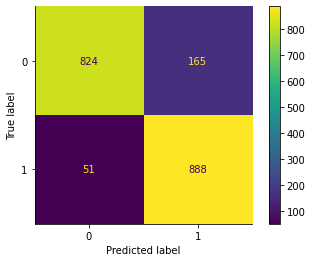

In [224]:
# Knn classifier for scaled data

from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=5)
show_model_results_scaled_data(knnModel)

**************DecisionTreeClassifier**************

Train Acc.: 100.00%
Test Acc.: 91.29%
Accuracy Score: 0.9128630705394191
F1_Score: 0.9128630705394192
Precision_Score: 0.9140917929159919
recall_Score: 0.9128630705394191

*******Confusion Matrix*******

[[880 109]
 [ 59 880]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


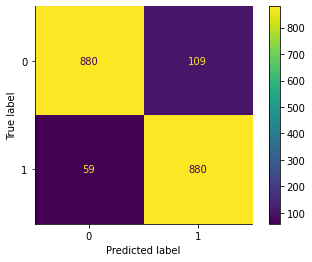

In [225]:
# Decision tree for scaled data

from sklearn.tree import DecisionTreeClassifier

treeModel = DecisionTreeClassifier()
show_model_results_scaled_data(treeModel)


From the above experiment it can be seen that the Decision Tree show better accuracy for normalized data but knn shows better accuracy for non normalized data. But in both cases the results are very close for both normalized and non normalized data.



From the all relations between different features, it can be assumed that the columns 'age', 'work_type', 'gender', 'hypertension', 'residential_type' , 'bmi' and 'smoking_status' are more important in predicting the heart_disease than the other features. By using these features only reducing the X inputs, the observations are as follows.

In [226]:
X.head()

,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,1,228.69,36.6,1,1
1,0,61.0,0,1,3,0,202.21,27.8,2,1
2,1,80.0,0,1,2,0,105.92,32.5,2,1
3,0,49.0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,1,3,0,174.12,24.0,2,1


In [227]:
X_reduced = X[['gender', 'age', 'hypertension', 'work_type', 'Residence_type', 'bmi', 'smoking_status']]
X_reduced.head()

,gender,age,hypertension,work_type,Residence_type,bmi,smoking_status
0,1,67.0,0,2,1,36.6,1
1,0,61.0,0,3,0,27.8,2
2,1,80.0,0,2,0,32.5,2
3,0,49.0,0,2,1,34.4,3
4,0,79.0,1,3,0,24.0,2


In [228]:
smote = SMOTE(sampling_strategy='minority')
X_sm_reduced, y_sm_reduced = smote.fit_resample(X_reduced, y)

In [229]:
# getting training and test data
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_sm_reduced, y_sm_reduced, test_size=0.2, random_state=42)

X_train_reduced.shape, y_train_reduced.shape

((7712, 7), (7712,))

In [230]:
def show_model_results_reduced_data(model):
    """A simple function to show a model results"""
    print(f"{model.__class__.__name__:*^50}\n")
    model.fit(X_train_reduced, y_train_reduced)
    y_pred_test_reduced = model.predict(X_test_reduced)
    print(f"Train Acc.: {model.score(X_train_reduced, y_train_reduced)*100:.2f}%")
    print(f"Test Acc.: {model.score(X_test_reduced, y_test_reduced)*100:.2f}%")
    print("Accuracy Score: " + str(accuracy_score(y_test_reduced, y_pred_test_reduced)))
    print("F1_Score: " + str(f1_score(y_test_reduced, y_pred_test_reduced, average='weighted')))
    print("Precision_Score: " + str(precision_score(y_test_reduced, y_pred_test_reduced, average='weighted')))
    print("recall_Score: " + str(recall_score(y_test_reduced, y_pred_test_reduced, average='weighted')))
    x = "Confusion Matrix"
    print(f"\n{x:*^30}\n")
    print(confusion_matrix(y_test_reduced, model.predict(X_test_reduced)))

    plot_confusion_matrix(model, X_test_reduced, y_test_reduced)

*****************NearestCentroid******************

Train Acc.: 77.02%
Test Acc.: 78.94%
Accuracy Score: 0.7894190871369294
F1_Score: 0.7885091224759959
Precision_Score: 0.7978281788364898
recall_Score: 0.7894190871369294

*******Confusion Matrix*******

[[709 280]
 [126 813]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


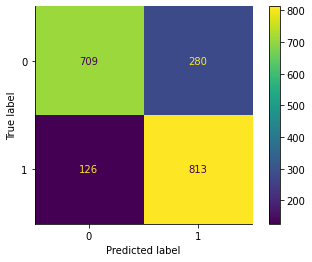

In [231]:
# MDC Classifier
from sklearn.neighbors import NearestCentroid
mdcModel = NearestCentroid()

show_model_results_reduced_data(mdcModel)

***************KNeighborsClassifier***************

Train Acc.: 91.47%
Test Acc.: 89.26%
Accuracy Score: 0.8926348547717843
F1_Score: 0.8921169617996627
Precision_Score: 0.9042835512804394
recall_Score: 0.8926348547717843

*******Confusion Matrix*******

[[805 184]
 [ 23 916]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


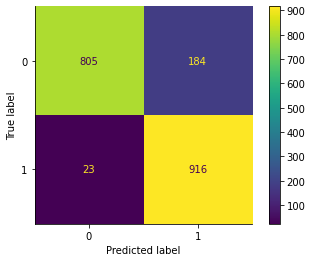

In [232]:
# Knn classifier

from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=5)
show_model_results_reduced_data(knnModel)

****************LogisticRegression****************

Train Acc.: 78.55%
Test Acc.: 80.60%
Accuracy Score: 0.8060165975103735
F1_Score: 0.8058549746051331
Precision_Score: 0.8089124871687366
recall_Score: 0.8060165975103735

*******Confusion Matrix*******

[[759 230]
 [144 795]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


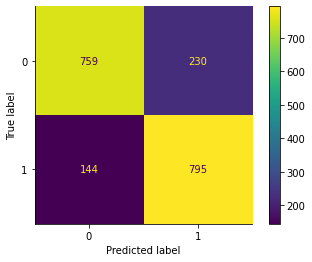

In [233]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

logModel = LogisticRegression()

show_model_results_reduced_data(logModel)

**************DecisionTreeClassifier**************

Train Acc.: 99.91%
Test Acc.: 92.53%
Accuracy Score: 0.9253112033195021
F1_Score: 0.9253227778062699
Precision_Score: 0.9258441829358405
recall_Score: 0.9253112033195021

*******Confusion Matrix*******

[[901  88]
 [ 56 883]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


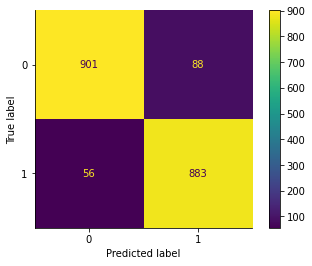

In [234]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

treeModel = DecisionTreeClassifier()
show_model_results_reduced_data(treeModel)

In [235]:
X_reduced.head()

,gender,age,hypertension,work_type,Residence_type,bmi,smoking_status
0,1,67.0,0,2,1,36.6,1
1,0,61.0,0,3,0,27.8,2
2,1,80.0,0,2,0,32.5,2
3,0,49.0,0,2,1,34.4,3
4,0,79.0,1,3,0,24.0,2


Now droping another two features like 'gender' and 'Residence_type' can have important observations as well.

In [236]:
X_reduced_again = X_reduced[['age', 'hypertension','work_type', 'bmi', 'smoking_status']]
smote = SMOTE(sampling_strategy='minority')
X_sm_reduced_again, y_sm_reduced_again = smote.fit_resample(X_reduced_again, y)

X_train_reduced_again, X_test_reduced_again, y_train_reduced_again, y_test_reduced_again = train_test_split(X_sm_reduced_again, y_sm_reduced_again, test_size=0.2, random_state=42)

X_train_reduced_again.shape, y_train_reduced_again.shape

((7712, 5), (7712,))

In [237]:
def show_model_results_reduced_again(model):
    """A simple function to show a model results"""
    print(f"{model.__class__.__name__:*^50}\n")
    model.fit(X_train_reduced_again, y_train_reduced_again)
    y_pred_test_reduced_again = model.predict(X_test_reduced_again)
    print(f"Train Acc.: {model.score(X_train_reduced_again, y_train_reduced_again)*100:.2f}%")
    print(f"Test Acc.: {model.score(X_test_reduced_again, y_test_reduced_again)*100:.2f}%")
    print("Accuracy Score: " + str(accuracy_score(y_test_reduced_again, y_pred_test_reduced_again)))
    print("F1_Score: " + str(f1_score(y_test_reduced_again, y_pred_test_reduced_again, average='weighted')))
    print("Precision_Score: " + str(precision_score(y_test_reduced_again, y_pred_test_reduced_again, average='weighted')))
    print("recall_Score: " + str(recall_score(y_test_reduced_again, y_pred_test_reduced_again, average='weighted')))
    x = "Confusion Matrix"
    print(f"\n{x:*^30}\n")
    print(confusion_matrix(y_test_reduced_again, model.predict(X_test_reduced_again)))

    plot_confusion_matrix(model, X_test_reduced_again, y_test_reduced_again)

*****************NearestCentroid******************

Train Acc.: 76.92%
Test Acc.: 78.27%
Accuracy Score: 0.7826763485477178
F1_Score: 0.7818405864138078
Precision_Score: 0.790229855757657
recall_Score: 0.7826763485477178

*******Confusion Matrix*******

[[706 283]
 [136 803]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


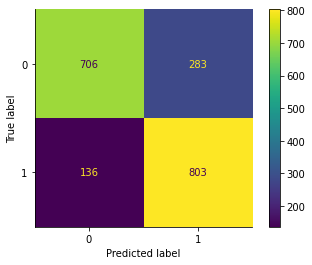

In [238]:
# MDC Classifier
from sklearn.neighbors import NearestCentroid
mdcModel = NearestCentroid()

show_model_results_reduced_again(mdcModel)

***************KNeighborsClassifier***************

Train Acc.: 91.51%
Test Acc.: 88.85%
Accuracy Score: 0.8884854771784232
F1_Score: 0.8877130136879372
Precision_Score: 0.9041061491282592
recall_Score: 0.8884854771784232

*******Confusion Matrix*******

[[788 201]
 [ 14 925]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


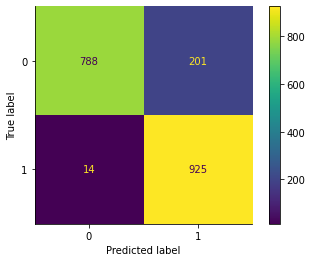

In [239]:
# Knn classifier

from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=5)
show_model_results_reduced_again(knnModel)

****************LogisticRegression****************

Train Acc.: 77.52%
Test Acc.: 78.16%
Accuracy Score: 0.7816390041493776
F1_Score: 0.7814780581112286
Precision_Score: 0.784223762172618
recall_Score: 0.7816390041493776

*******Confusion Matrix*******

[[737 252]
 [169 770]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


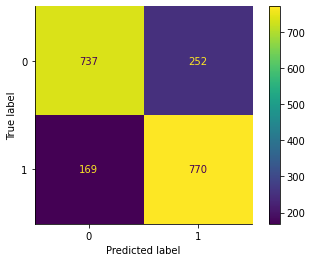

In [240]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

logModel = LogisticRegression()

show_model_results_reduced_again(logModel)

**************DecisionTreeClassifier**************

Train Acc.: 99.88%
Test Acc.: 91.39%
Accuracy Score: 0.9139004149377593
F1_Score: 0.9139143158535766
Precision_Score: 0.9141249026905314
recall_Score: 0.9139004149377593

*******Confusion Matrix*******

[[896  93]
 [ 73 866]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


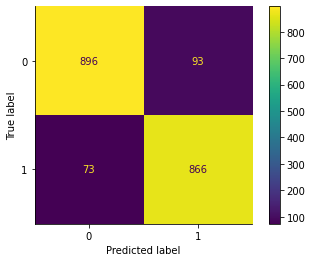

In [241]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

treeModel = DecisionTreeClassifier()
show_model_results_reduced_again(treeModel)

From the above experiment it can be inferred that by removing the further two features 'gender' and 'Residence_type', the metrices stay almost same.

So, the dataset can be reduced to only five input variables - 'age', 'hypertension','work_type', 'bmi', and 'smoking_status' in order to predict the target 'heart_disease' efficiently.